In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import pickle

# Part 2 - Report

### Exercise 5

Let's load the trajectories and perform Monte Carlo evaluation to find $v_\pi(s)$ and $q_\pi(a, s)$.

In [2]:
# Load the trajectories
f = open("trajectories.pickle", "rb")
trajectories = pickle.load(f)
f.close()

In [3]:
print(trajectories[0][:5])

[((15, 0), 0, -0.5058824, (14, 0)), ((14, 0), 6, -0.5058824, (14, 0)), ((14, 0), 5, -0.5058824, (15, 1)), ((15, 1), 3, -0.5058824, (16, 0)), ((16, 0), 3, -0.5058824, (17, 0))]


In [4]:
# Store v_π and q_π in respective arrays
v_π = np.array([[0 for _ in range(100)] for _ in range(32)])
q_π = np.array([[[0 for _ in range(8)] for _ in range(100)] for _ in range(32)])

# Let's choose a discount factor gamma of 0.99
gamma = 0.99

# Store number of times trajectories go through each state
N_s = np.zeros_like(v_π)
N_as = np.zeros_like(q_π)

# Compute these respective values from the given trajectories
for trajectory in trajectories:
    # Iterate trajectory back-to-front
    G_τ = 0
    for start_state, action, reward, end_state in reversed(trajectory):
        N_s[start_state] += 1
        N_as[start_state][action] += 1

        G_τ = reward + gamma * G_τ
        v_π[start_state] += (G_τ - v_π[start_state]) / N_s[start_state]
        q_π[start_state][action] += (G_τ - q_π[start_state][action]) / N_as[start_state][action]

Let's now plot the state-value function $v_\pi(s)$.

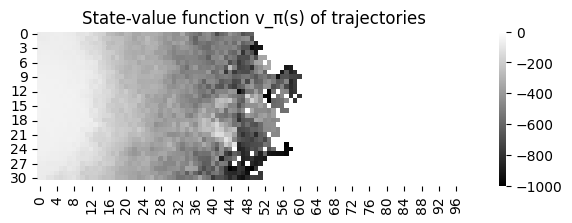

In [5]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(v_π, cmap="gray")
plt.title("State-value function v_π(s) of trajectories")
plt.show()

------------------------------------------
### 4. (*)

We can see that no trajectory got more than halfway down the mountain. As every value on the right is 0, it indicates they are unexplored. This will be a problem as we can not compute an evaluation for the whole map, meaning we again can not calculate an optimal policy for the whole map.

------------------------------------------

------------------------------------------
### 5. (*)

No, we cannot perform Monte Carlo improvement. This is because to perform MC improvement we will need an already existing policy $\pi$ (one to improve). As we do not currently have a policy $\pi$, this will thus be impossible.

------------------------------------------

------------------------------------------
### 6. (*)

Yes, we can however perform Monte Carlo control. MC Control does not need an existing policy (other than a random starting policy). Therefore we can use the calcuated evaluation together with a starting policy $\pi_0$ to compute a policy.

Note that this computed policy will not be optimal for the whole map. As the computed values $q_\pi(a, s)$ do not represent the real evaluation for the whole map, our resulting MC control policy will most likely not represent the optimal policy $\pi^*$.

------------------------------------------